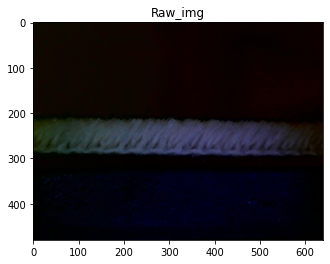

width_640,height_480


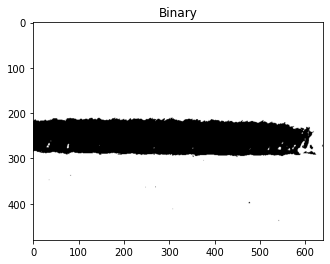

tt_len [77 76 76 77 76 76 77 77 78 76 76 76 76 77 75 73 73 74 74 75 76 77 78 78
 75 74 74 75 75 77 78 78 77 77 77 79 79 79 79 79 79 78 77 78 78 79 79 80
 78 77 76 75 76 76 76 76 78 78 79 77 77 77 78 79 79 80 80 79 78 79 80 76
 77 78 78 79 76 76 75 76 77 79 79 79 79 79 77 77 76 75 76 77 78 79 79 80
 80 75 76 76 78 78 78 78 78 79 78 79 82 78 81 80 80 84 82 80 79 79 78 79
 78 78 78 77 75 76 77 78 76 76 76 74 74 75 74 75 75 76 77 78 78 79 79 78
 78 78 78 79 79 78 78 78 77 77 78 79 79 80 80 82 77 77 78 79 80 81 81 81
 80 77 78 78 78 77 77 73 73 73 73 74 74 87 76 76 76 74 74 75 74 73 73 74
 76 74 75 75 76 77 78 78 78 77 77 77 76 77 77 78 77 77 77 77 77 78 78 77
 77 75 75 75 76 77 77 76 76 76 75 74 74 75 75 75 75 75 75 76 76 77 74 75
 76 76 75 76 76 75 75 74 74 74 74 75 75]
tt_len_count 253


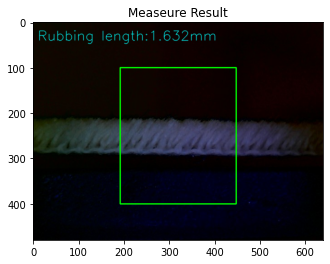

In [28]:
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

Im=Image.open('C:/Users/seanchlin/AI_project/Rubbing_Lenth/img/Jpg_1.64.jpg') #原圖,Image type(PIL)
Im_gray=Image.open('C:/Users/seanchlin/AI_project/Rubbing_Lenth/img/Jpg_1.64.jpg').convert('L') #Image type，並轉灰階
Im_raw=cv2.imread('C:/Users/seanchlin/AI_project/Rubbing_Lenth/img/Jpg_1.64.jpg') #Array type(cv)
Im_raw=cv2.cvtColor(Im_raw, cv2.COLOR_BGR2RGB) # CV讀取為BGR,轉回RGB

plt.imshow(Im)
plt.title('Raw_img')
plt.show()
width, height = Im_gray.size
print('width_{},height_{}'.format(width,height))

## 灰階照片
# plt.imshow(Im_gray,cmap = plt.get_cmap('gray'))
# plt.title('gray_img')
# plt.show()

# 圖像前處理，設threashold將圖片二值化
#宣告放黑色pixel
ss=[]
for y in range(height):
    for x in range(width):
        z=Im_gray.getpixel((x,y)) #getpixel 取出每個pixel 
        if z > 20:
            z=0
        else:
            z=255
        ss.append(z)
ary = np.array(ss) #將二值後的資料轉Array

# numpy轉image & show 二值化的圖
pic=ary.reshape(height, width)
# 確認二值化後的結果
pd.DataFrame(pic).to_csv('C:/Users/seanchlin/AI_project/Rubbing_Lenth/Bin.csv')
#convert numpy array to image
Im_bin=Image.fromarray(pic) 

plt.imshow(Im_bin)
plt.title('Binary')
plt.show()
print('=======================================')
table=pd.DataFrame(ary.reshape(height, width)) # reshape to image size and transfer to Dataframe

x_idx=[]
tt_len=[]
for row in range(int(0.3*width),int(0.7*width)):
    for col in range(height):
        if table.iloc[col,row]==0:
            x_idx.append(col)
    len_=max(x_idx)-min(x_idx)+1

    if 70<len_<100: #卡長度篩異常
        tt_len.append(len_)
    x_idx=[] #reset 每一round的list重新取值

tt_len=np.array(tt_len)
# print('tt_len',tt_len)
# print('tt_len_count',len(tt_len))


#=================================================
# 量測結果顯示於原圖
text = 'Rubbing length:'+str(round((np.mean(tt_len))*0.0212,3))+'mm'
predict=cv2.putText(Im_raw, text, (10, 40), cv2.FONT_HERSHEY_SIMPLEX,1, (0, 255, 255), 1, cv2.LINE_AA)
predict=cv2.rectangle(Im_raw,(int(0.3*width),100),(int(0.7*width),100+300),(0, 255, 0),thickness=2)
plt.title('Measeure Result')
plt.imshow(predict)
# plt.imshow(Im_raw)